In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML;  display(HTML('<style>.container { width:95% !important; }</style>'))
pd.set_option('display.max_columns', 50)

# Regresja liniowa
## Wprowadzenie

**Regresja** - wyznaczenie wartości zmiennej numerycznej na podstawie wartości innych zmiennych numerycznych.

Jeśli wzór na **przybliżoną** wartość zmiennej zależnej względem zmiennych niezależnych da się przedstawić w następujący sposób:

$y = a_0 + a_1 \cdot x_1 + a_2 \cdot x_2 + ...$

możemy użyć regresji liniowej.

---

**Na początek** założymy istnienie tylko **jednej** zmiennej niezależnej. 

Wówczas powyższy wzór przyjmie postać:

$y = a\cdot x + b$

Taki model nazywamy **regresją prostą**.

In [2]:
np.random.seed(7)
df = pd.read_csv("data/cars.csv", usecols=["price", "power"]).sample(20)
df

,price,power
33909,74000,250.0
92307,28900,105.0
89107,20700,140.0
9538,22900,92.0
31008,19700,107.0
71305,36900,100.0
71012,11999,75.0
62938,26000,231.0
20435,46000,170.0
3703,12500,94.0


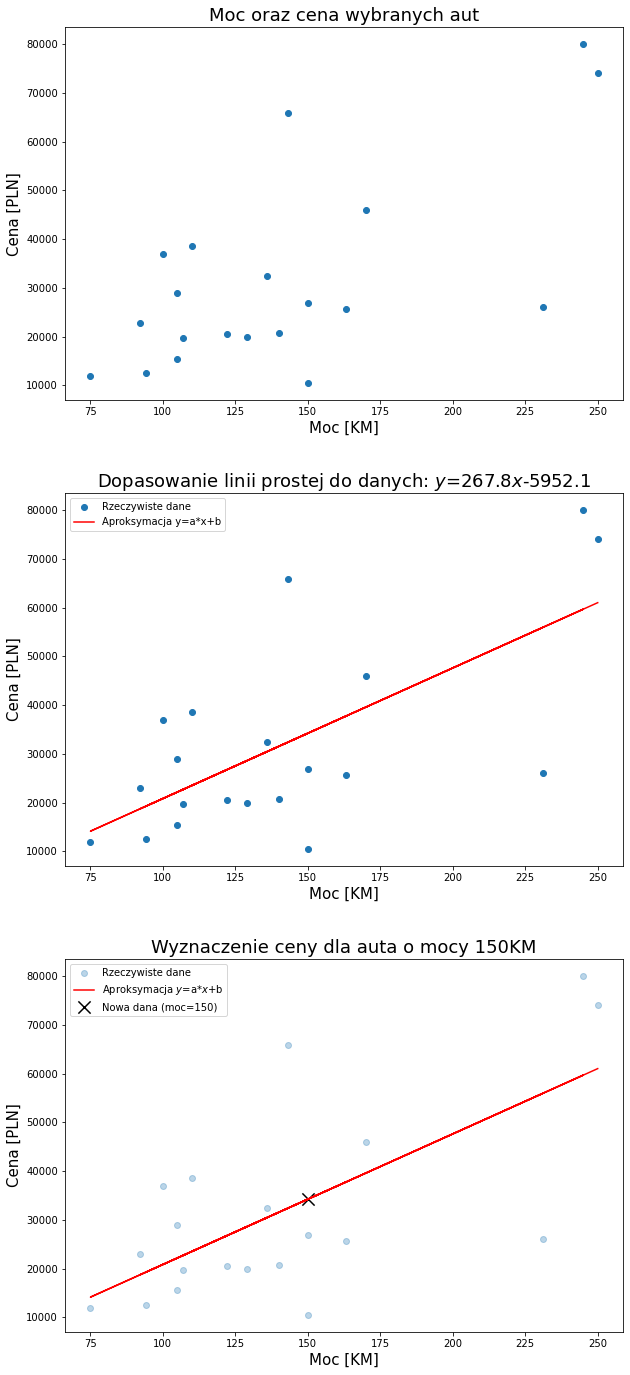

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 24), nrows=3)

# ---
ax[0].scatter(df["power"], df["price"], label='Rzeczywiste dane')
ax[0].set_xlabel("Moc [KM]", fontsize=15)
ax[0].set_ylabel("Cena [PLN]", fontsize=15)
ax[0].set_title("Moc oraz cena wybranych aut", fontsize=18)

# ---
ax[1].scatter(df["power"], df["price"], label='Rzeczywiste dane')
a, b = np.polyfit(df["power"], df["price"], 1)
ax[1].plot(df["power"], a*df["power"]+b, 'r', label='Aproksymacja y=a*x+b')
ax[1].set_title(f"Dopasowanie linii prostej do danych: $y$={round(a, 1)}$x${round(b, 1)}", fontsize=18)
ax[1].set_xlabel("Moc [KM]", fontsize=15)
ax[1].set_ylabel("Cena [PLN]", fontsize=15)
ax[1].legend()

# ---
ax[2].scatter(df["power"], df["price"], label='Rzeczywiste dane', alpha=0.3)
a, b = np.polyfit(df["power"], df["price"], 1)
plt.plot(df["power"], a*df["power"]+b, 'r', label='Aproksymacja $y$=a*$x$+b')
plt.scatter(150, a*150+b, c='k', s=150, marker='x', label='Nowa dana (moc=150)')
ax[2].set_xlabel("Moc [KM]", fontsize=15)
ax[2].set_ylabel("Cena [PLN]", fontsize=15)
ax[2].legend()
ax[2].set_title("Wyznaczenie ceny dla auta o mocy 150KM", fontsize=18)

fig.subplots_adjust(hspace=0.25)

---

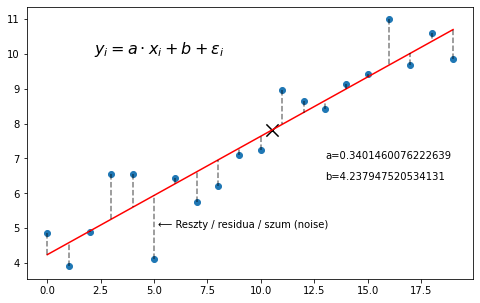

In [4]:
np.random.seed(0)
n_of_points = 20
x = np.arange(n_of_points)
y = 0.4*x + 3.1 + np.random.normal(size=n_of_points)

plt.figure(figsize=(8, 5))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, 'r');

plt.scatter(10.5, a*10.5+b, marker='x', c='k', s=150);

for x_, y_ in zip(x, y):
    plt.plot([x_]*2, [y_, a*x_+b], 'k--', alpha=.5)
    
plt.text(5.2, 5, "⟵ Reszty / residua / szum (noise)")
plt.text(2.2, 10, "$y_i = a \cdot x_i + b + ε_i$", fontdict={"size": 16});
plt.text(13, 7, f"a={a}")
plt.text(13, 6.4, f"b={b}");

## Założenia modelu

*czyli kiedy możemy użyć regresji liniowej*

1. Mamy do czynienia z zależnością liniową
2. Liczba obserwacji musi być większa niż liczba predyktorów
3. Homoscedastyczność - wariancja reszt składnika losowego jest taka sama dla wszystkich obserwacji
4. Wartości reszt modelu są opisane przez rozkład normalny
5. Brak korelacji między zmiennymi niezależnymi


Przed zastosowaniem regresji liniowej powinniśmy (teoretycznie) sprawdzić wszystkie te warunki.

W praktyce z regresji liniowej się nie korzysta. Jest jednak najprostszym modelem do regresji, więc można na jej podstawie omówić najważniejsze koncepcje dotyczące ML.

***Homo- vs. heteroscedastyczność***

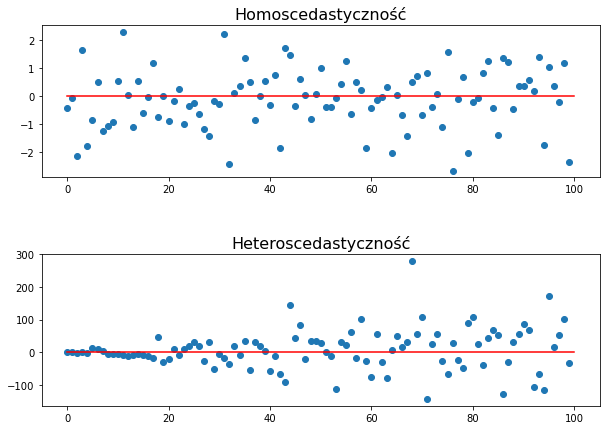

In [5]:
np.random.seed(2)

x = np.arange(100)
y_homo = np.random.normal(size=len(x))
y_hetero = np.random.normal(size=len(x)) * x


fig, ax = plt.subplots(figsize=(10, 7), nrows=2)

ax[0].scatter(x, y_homo)
ax[0].plot([0, 100], [0, 0], 'r')
ax[0].set_title("Homoscedastyczność", fontsize=16)

ax[1].scatter(x, y_hetero)
ax[1].plot([0, 100], [0, 0], 'r')
ax[1].set_title("Heteroscedastyczność", fontsize=16)

plt.subplots_adjust(hspace=0.5)

## Metoda najmniejszych kwadratów

W jaki sposób dopasować linię prostą do zbioru $N$ punktów? Suma kwadratów reszt powinna być najmniejsza z możliwych

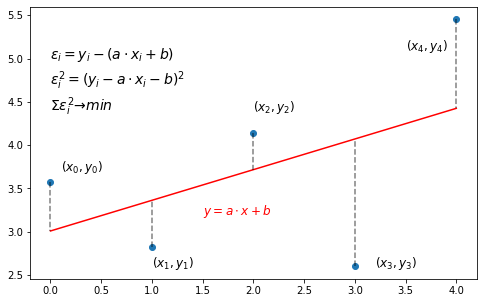

In [6]:
np.random.seed(12)
n_of_points = 5
x = np.arange(5)
y = 0.4*x + 3.1 + np.random.normal(size=n_of_points)

plt.figure(figsize=(8, 5))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, 'r');

for x_, y_ in zip(x, y):
    plt.plot([x_]*2, [y_, a*x_+b], 'k--', alpha=.5)
    
plt.text(0, 5, "$ε_i = y_i - (a\cdot x_i + b)$", fontdict={"size": 14})
plt.text(0, 4.7, "$ε_i^2 = (y_i - a\cdot x_i - b)^2$", fontdict={"size": 14})
plt.text(0, 4.4, "$\Sigma ε_i^2 → min$", fontdict={"size": 14})

plt.text(0.1, 3.7, "$(x_0, y_0)$", fontdict={"size": 12})
plt.text(1, 2.6, "$(x_1, y_1)$", fontdict={"size": 12})
plt.text(2, 4.4, "$(x_2, y_2)$", fontdict={"size": 12})
plt.text(3.2, 2.6, "$(x_3, y_3)$", fontdict={"size": 12})
plt.text(3.5, 5.1, "$(x_4, y_4)$", fontdict={"size": 12})


plt.text(1.5, 3.2, "$y=a\cdot x + b$", fontdict={"size": 12, "color": "red"});

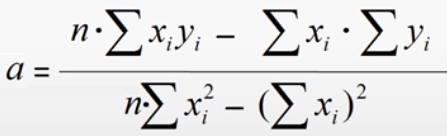

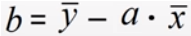

## Regresja na wielu zmiennych

<IPython.core.display.Javascript object>


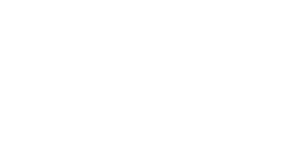

In [7]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

a = 2
b = 3
Z = a*X + b*Y

ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$Y$")

surf = ax.plot_surface(X, Y, Z, cmap='jet', alpha=.3)


np.random.seed(0)
x = np.random.uniform(-4, 4, size=16)
y = np.random.uniform(-4, 4, size=16)
z = a*x+b*y + 6*np.random.normal(size=16)
ax.scatter(x, y, z);

ax.scatter([0], [0], [0], 'r')

plt.show()

In [8]:
np.random.seed(2)
df = pd.read_csv("data/cars.csv", usecols=["price", "power", "mileage"]).sample(20)

<IPython.core.display.Javascript object>


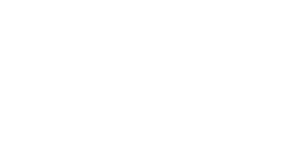

In [9]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

a = 200
b = -0.158
c = 28766

X = np.arange(90, 400, 10)
Y = np.arange(5e4, 4.5e5, 1e3)
X, Y = np.meshgrid(X, Y)
Z = a*X + b*Y + c

ax.set_xlabel("Power")
ax.set_ylabel("Mileage")
ax.set_zlabel("Price")

surf = ax.plot_surface(X, Y, Z, cmap='jet', alpha=.3)

x = df["power"]
y = df["mileage"]
z = df["price"]
ax.scatter(x, y, z)

ax.scatter([200], [100000], [a*200 + b*100000 + c], 'r');

## Regresja w Pythonie

In [10]:
np.random.seed(2)
df = pd.read_csv("data/cars.csv", usecols=["price", "power", "mileage"]).dropna().sample(60).reset_index(drop=True)
df.head()

,price,power,mileage
0,43900,125.0,135767.0
1,24000,286.0,89800.0
2,9900,170.0,249000.0
3,62900,110.0,23020.0
4,35900,140.0,138000.0


**Inicjalizacja modelu**

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

**Podział zbioru danych**

In [12]:
from sklearn.model_selection import train_test_split

X = df[["power", "mileage"]]  #.values
y = df["price"]  #.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.head()

,power,mileage
43,160.0,118255.0
19,111.0,35844.0
34,82.0,61475.0
58,129.0,240000.0
25,129.0,107000.0


In [14]:
y_train.head()

43    25700
19    42900
34    36777
58    14900
25    14900
Name: price, dtype: int64

In [15]:
X_test.head()

,power,mileage
0,125.0,135767.0
5,165.0,216280.0
36,68.0,217571.0
45,145.0,226755.0
13,140.0,181000.0


In [16]:
y_test.head()

0     43900
5      8990
36    12800
45    13000
13    35500
Name: price, dtype: int64

**Dopasowanie modelu i predykcja**

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(model.coef_)
print(model.intercept_)

[173.60742978  -0.20687535]
45033.801052941024


In [19]:
model.feature_names_in_

array(['power', 'mileage'], dtype=object)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([38647.88436124, 28936.0266337 , 11829.02986997, 23296.85876442,
       31894.40317766, 79125.14252186, 67428.95261973, 36740.87553735,
       15063.69628994, 18720.35049638, 31670.8536144 , 13879.19425797,
       15040.76747564, 59368.34781097, 26525.16038749, 43477.44267907,
       43055.89553389, 55724.76467556, 18846.72055954, 40790.04315521])

In [21]:
y_test.values

array([ 43900,   8990,  12800,  13000,  35500, 127000, 110300,  27950,
         7900,   9500,  22500,  31500,  13900,  62900,  11900,  55555,
        12500,  79500,  11800,  35900])

> ZADANIA

## Ewaluacja modelu
### Ewaluacja graficzna

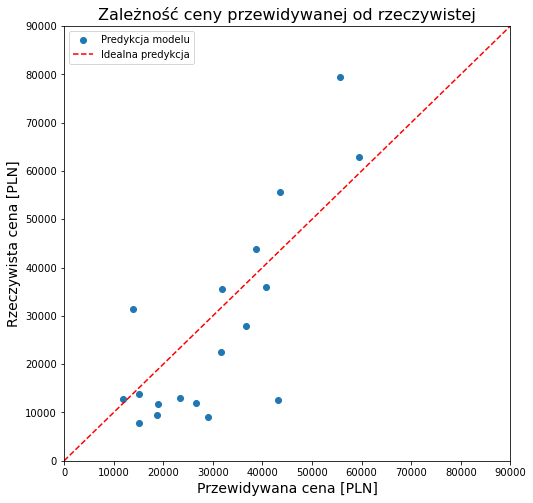

In [22]:
%matplotlib inline
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test, label='Predykcja modelu')
plt.plot([0, 9e4], [0, 9e4], 'r--', label='Idealna predykcja')

plt.title("Zależność ceny przewidywanej od rzeczywistej", fontsize=16)
plt.xlabel("Przewidywana cena [PLN]", fontsize=14)
plt.ylabel("Rzeczywista cena [PLN]", fontsize=14)

plt.legend()

plt.xlim([0, 9e4])
plt.ylim([0, 9e4]);

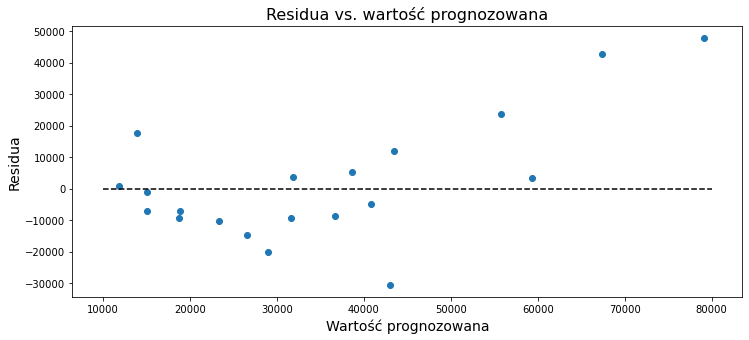

In [23]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred, y_test - y_pred)
plt.plot([1e4, 8e4], [0, 0], 'k--')

plt.xlabel("Wartość prognozowana", fontsize=14)
plt.ylabel("Residua", fontsize=14)
plt.title("Residua vs. wartość prognozowana", fontsize=16);

### Metryki błędów
**Przykładowe metryki błędów predykcji:**

MAE - mean absolute error

MSE - mean squared error

RMSE - root mean squared error

MAPE - mean absolute percentage error

$R^2$ - współczynnik determinancji

In [24]:
y_test.values

array([ 43900,   8990,  12800,  13000,  35500, 127000, 110300,  27950,
         7900,   9500,  22500,  31500,  13900,  62900,  11900,  55555,
        12500,  79500,  11800,  35900])

In [25]:
y_pred

array([38647.88436124, 28936.0266337 , 11829.02986997, 23296.85876442,
       31894.40317766, 79125.14252186, 67428.95261973, 36740.87553735,
       15063.69628994, 18720.35049638, 31670.8536144 , 13879.19425797,
       15040.76747564, 59368.34781097, 26525.16038749, 43477.44267907,
       43055.89553389, 55724.76467556, 18846.72055954, 40790.04315521])

#### Mean absolute error (MAE)
$\text{MAE} = \dfrac{1}{n} \cdot \sum\limits_{i} |y_i - \hat{y}_i|$

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

14021.354323696703

In [27]:
np.abs(y_pred - y_test).sum() / len(y_test)

14021.354323696703

In [28]:
# ewaluacja na danych uczących
mean_absolute_error(y_train, model.predict(X_train))

18707.214076519187

#### Mean squared error (MSE)

$\text{MSE} = \dfrac{1}{n} \cdot \sum\limits_{i} (y_i - \hat{y}_i)^2$

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

361478301.3356483

In [30]:
np.square(y_pred - y_test).sum() / len(y_test)

361478301.3356483

In [31]:
# ewaluacja na danych uczących
mean_squared_error(y_train, model.predict(X_train))

628172233.5706127

#### Root mean squared error (RMSE)

$\text{RMSE} = \sqrt{\dfrac{1}{n} \cdot \sum\limits_{i} (y_i - \hat{y}_i)^2}$

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

19012.582710816758

In [33]:
np.sqrt(np.square(y_pred - y_test).sum() / len(y_test))

19012.582710816758

In [34]:
# ewaluacja na danych uczących
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

25063.364370543168

#### Mean absolute percentage error (MAPE)

$\text{MAPE} = \dfrac{100\%}{n} \cdot \sum\limits_{i} |\dfrac{y_i - \hat{y}_i}{\hat{y}_i}|$

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred) * 100

61.46935779576449

In [36]:
np.abs((y_pred - y_test) / y_test).sum() / len(y_test) * 100

61.46935779576449

In [37]:
# ewaluacja na danych uczących
mean_absolute_percentage_error(y_train, model.predict(X_train)) * 100

65.16367938560883

#### Współczynnik determinancji $R^2$

W pewnych przypadkach: kwadrat współczynnika korelacji Pearsona

Tzw. ogólna definicja:
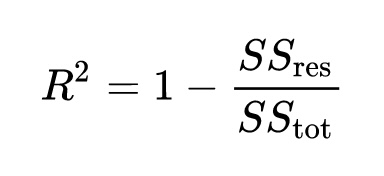

Implementacja w sklearn (jeszcze bardziej ogólna definicja):
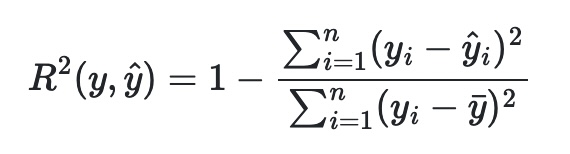


$SS_{RES}$ - sum of squared residuals, czyli suma kwadratów różnic między y_true a y_pred

$SS_{TOT}$ - total sum of squares, czyli suma kwadratów wartości prawdziwych

$y_i$ - prawdziwa wartość

$\hat{y}$ - przewidywana wartość

$\overline{y}$ - średnia prawdziwych wartość

**Najważniejsze informacje:**
- istnieją różne interpretacje tego współczynnika
- określa jak dobrze dopasowane do siebie są dwa zestawy wartości, w praktyce - wartości rzeczywiste oraz przewidywane
- jego maksymalna wartość to 1 i oznacza najlepszy możliwy model. Im mniejsza wartość tym gorzej

In [38]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6803131748540561

In [39]:
x1 = [0, 1]
x2 = [1, 0]

r2_score(x1, x2)

-3.0

In [40]:
model.score(X_test, y_test)

0.6803131748540561

---
Różnica między MAE a MSE

$\text{MAE} = \dfrac{1}{n} \cdot \sum\limits_{i} |y_i - \hat{y}_i|$

$\text{MSE} = \dfrac{1}{n} \cdot \sum\limits_{i} (y_i - \hat{y}_i)^2$

In [41]:
y_true = np.zeros(100)
y_pred = np.linspace(-3, 3, 100)

mae = [mean_absolute_error([y_t], [y_p]) for y_t, y_p in zip(y_true, y_pred)]
mse = [mean_squared_error([y_t], [y_p]) for y_t, y_p in zip(y_true, y_pred)]

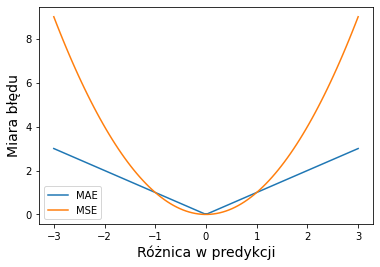

In [42]:
plt.plot(y_pred, mae, label='MAE')
plt.plot(y_pred, mse, label='MSE')
plt.xlabel("Różnica w predykcji", fontsize=14)
plt.ylabel("Miara błędu", fontsize=14)

plt.legend();

Mean squared error daje większą karę za większe różnice w predykcji niż mean absolute error. Jest za to trudniejszy w interpretacji

### Istotność zmiennych

$y = a_0 + a_1 \cdot x_1 + a_2 \cdot x_2$

In [43]:
model.feature_names_in_

array(['power', 'mileage'], dtype=object)

In [44]:
model.n_features_in_

2

In [45]:
model.coef_

array([173.60742978,  -0.20687535])

In [46]:
model.intercept_

45033.801052941024

Współczynniki mogą naprowadzić nas na to, jakie przełożenie mają poszczególne cechy na ostateczny wynik, ale dopiero po **przeskalowaniu** będzie to miarodajne.

---

In [47]:
import statsmodels.api as sm

ols_model = sm.OLS(y, X).fit()  # ordinary least squares
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              86.03
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                    4.43e-18
Time:                        08:36:56   Log-Likelihood:                         -694.37
No. Observations:                  60   AIC:                                      1393.
Df Residuals:                      58   BIC:                                      1397.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
power        411.9938     38.343     10.745      0.000     335.241     488.746
mileage       -0.1620      0.034     -4.705      0.000      -0.231      -0.093
==============================================================================
Omnibus:                        8.457   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               18.418
Skew:                          -0.044   Prob(JB):                     0.000100
Kurtosis:                       5.713   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
ols_model.pvalues

power      2.024742e-15
mileage    1.618409e-05
dtype: float64

In [49]:
ols_model.tvalues

power      10.744872
mileage    -4.704729
dtype: float64

In [50]:
ols_model.aic

1392.7310123984353

In [51]:
ols_model.bic

1396.9197015228794

***

In [52]:
from sklearn.datasets import make_regression

X_, y_ = make_regression(n_samples=100, n_features=4)

X_ = pd.DataFrame(X_)
y_ = pd.Series(y_)

In [53]:
X_.head()

,0,1,2,3
0,-0.343804,-1.772538,-0.542342,0.225683
1,0.072636,-0.326380,1.126555,-2.154524
2,-0.334178,1.591764,-1.884242,-0.723176
3,0.191898,0.579596,-1.743977,-0.118131
4,-0.776086,0.309590,-1.647972,0.293845


In [54]:
y_.head()

0   -214.515631
1    -10.480342
2    -45.768412
3    -91.742341
4   -122.796033
dtype: float64

In [55]:
ols_model = sm.OLS(y_, X_).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.273e+32
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        08:36:56   Log-Likelihood:                          2898.2
No. Observations:                 100   AIC:                                     -5788.
Df Residuals:                      96   BIC:                                     -5778.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             29.5421   6.23e-15   4.75e+15      0.000      29.542      29.542
1             93.9604   6.07e-15   1.55e+16      0.000      93.960      93.960
2             84.6518   5.91e-15   1.43e+16      0.000      84.652      84.652
3             35.8893   6.53e-15    5.5e+15      0.000      35.889      35.889
==============================================================================
Omnibus:                        1.697   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.304
Skew:                           0.024   Prob(JB):                        0.521
Kurtosis:                       2.443   Cond. No.                         1.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ZADANIA

## Feature engineering

Często można osiągnąć lepsze rezultaty poprzez utworzenie nowych zmiennych na bazie już istniejących

In [56]:
df = pd.read_csv("data/cars.csv", parse_dates=["offer_timestamp"]).dropna()
df = df[df["prod_year"] < 2021]
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
5,19400,PLN,BMW,Kombi,2497.0,Benzyna+LPG,Tył,177.0,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przód,140.0,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00


In [57]:
def train_predict_and_evaluate(X_train, X_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred)

Na początek: mileage, power, prod_year

In [58]:
X = df[["mileage", "power", "prod_year"]]
y = df["price"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

8754075576.279108

Dodajmy nową zmienną - age

In [59]:
df["age"] = df["offer_timestamp"].dt.year - df["prod_year"]  # rok wystawienia oferty minus rok produkcji

Ponowne trenowanie modelu

In [60]:
X = df[["mileage", "power", "prod_year", "age"]]
y = df["price"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

8754075576.27911

Bez zmian. Dodajmy więc nową zmienną - km_per_year

In [61]:
df["km_per_year"] = df["mileage"] / df["age"]

In [62]:
X = df[["mileage", "power", "prod_year", "age", "km_per_year"]]
y = df["price"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

8752366209.419086

In [63]:
X = df[["power", "prod_year", "km_per_year"]]  # usuwamy kolumny użyte do konstrukcji nowej zmiennej, aby zachować liniową niezależność zmennnych w modelu (założenia)
y = df["price"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

8753973048.60863

Błąd nieco spadł.

---
Feature engineering czasami wykonujemy losowo (lub intuicyjnie) próbując stworzyć nowe cechy metodą prób i błędów. Zdarza się jednak że świadomie chcemy wydobyć z cech ich części składowe, np. rozbijając datę na rok, miesiąc i dzień.

In [64]:
df["offer_timestamp"].dt.year

0        2021
2        2021
3        2021
5        2021
6        2021
         ... 
99986    2021
99987    2021
99989    2021
99996    2021
99999    2021
Name: offer_timestamp, Length: 45167, dtype: int64

In [65]:
df["offer_timestamp"].dt.month

0        2
2        2
3        2
5        2
6        2
        ..
99986    4
99987    4
99989    4
99996    4
99999    4
Name: offer_timestamp, Length: 45167, dtype: int64

In [66]:
df["offer_timestamp"].dt.day

0        28
2        28
3        28
5        28
6        28
         ..
99986    21
99987    21
99989    21
99996    21
99999    21
Name: offer_timestamp, Length: 45167, dtype: int64

> ZADANIA

## Preprocessing danych
Zanim zaczniemy trenować model możemy wykonać szereg transformacji danych, które pozwolą nam ulepszyć jego performance

### Scaling (normalizacja, standaryzacja)

Scaling polega na przeskalowaniu oryginalnych wartości a więc poddanie ich pewnej transformacji.

Najczęściej wykorzystywane sposoby skalowania to:
- Normalizacja
- Standaryzacja

Skalujemy wyłącznie cechy, target powinien zostać niezmieniony.

**Uwaga** - nie dla wszystkich algorytmów ML scaling będzie konieczny i pomocny.

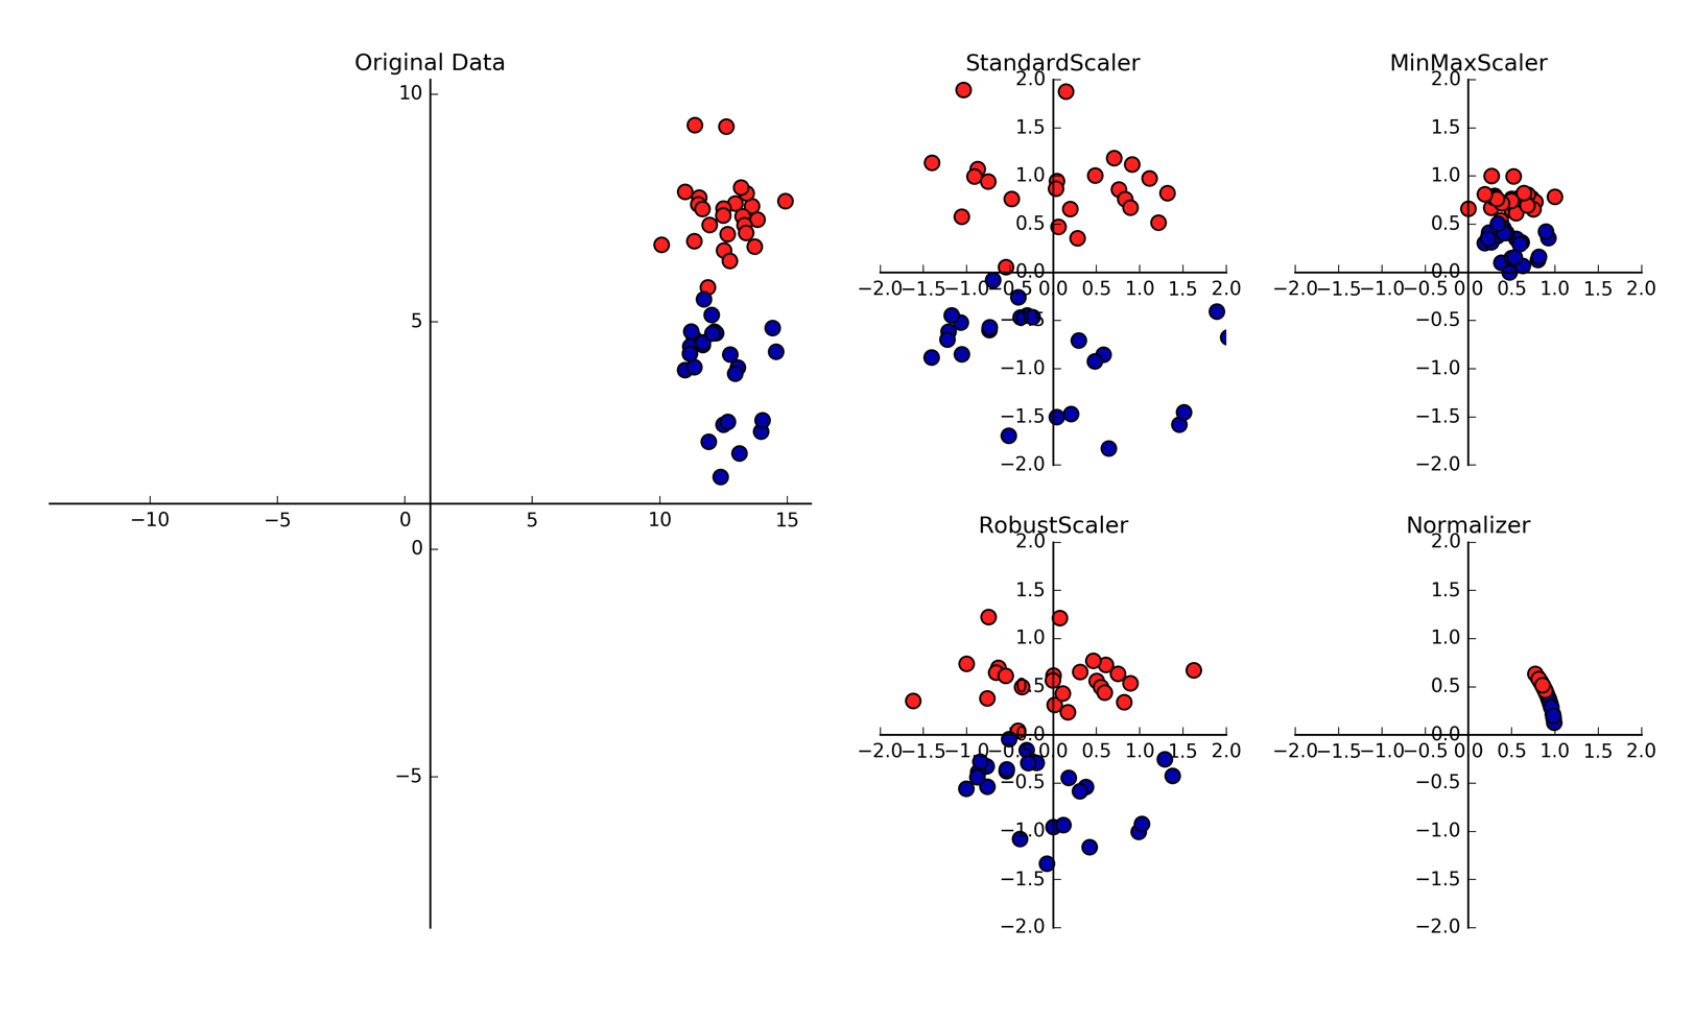


#### Normalizacja (MinMaxScaler)
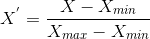

Przykłady:

[1, 10, 100] → [0, 0.091, 1]

[20, 30, 50, 80] → [0, 0.167, 0.5, 1]

---

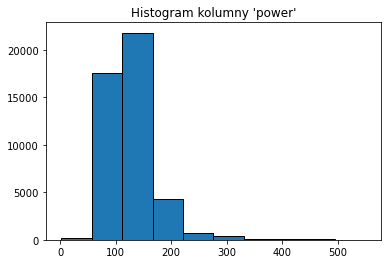

In [67]:
plt.hist(df["power"], edgecolor='k')
plt.title("Histogram kolumny 'power'");

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[["power"]])
df["power"] = scaler.transform(df[["power"]])

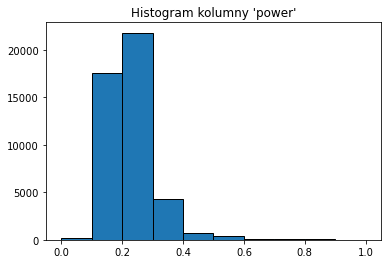

In [69]:
plt.hist(df["power"], edgecolor='k')
plt.title("Histogram kolumny 'power'");

---

In [70]:
df_ = pd.DataFrame({"a": [4, 1, 6, 2], "b": [5, 10, 22, 512]})
df_

,a,b
0,4,5
1,1,10
2,6,22
3,2,512


In [71]:
scaler_ = MinMaxScaler()

scaler_.fit_transform(df_[["a"]])

array([[0.6],
       [0. ],
       [1. ],
       [0.2]])

In [72]:
scaler_ = MinMaxScaler()

scaler_.fit(df_[["a"]])
scaler_.transform(df_[["a"]])

array([[0.6],
       [0. ],
       [1. ],
       [0.2]])

Jeżeli poddamy normalizacji wszystkie cechy, będą one miały taki sam zakres - [0, 1]. Unikniemy sytuacji, gdzie jedna cecha ma bardzo dużą wariancję a inna znacząco mniejszą

In [73]:
df_.iloc[:, :] = MinMaxScaler().fit_transform(df_)
df_

,a,b
0,0.6,0.000000
1,0.0,0.009862
2,1.0,0.033531
3,0.2,1.000000


#### Standaryzacja (StandardScaler)
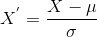

Przykłady:

[4, 1, 6, 2] → [0.39056673, -1.1717002 , 1.43207802, -0.65094455]

[5, 10, 22, 512] → [-0.61099506, -0.58789505, -0.53245505,  1.73134516]

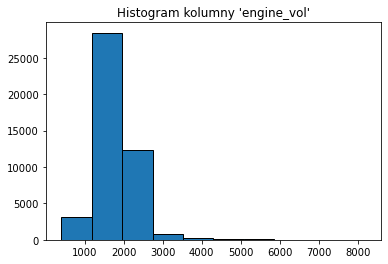

In [74]:
plt.hist(df["engine_vol"], edgecolor='k')
plt.title("Histogram kolumny 'engine_vol'");

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[["engine_vol"]])
df["engine_vol"] = scaler.transform(df[["engine_vol"]])

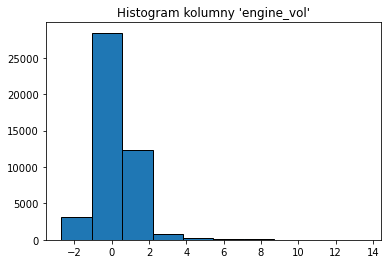

In [76]:
plt.hist(df["engine_vol"], edgecolor='k')
plt.title("Histogram kolumny 'engine_vol'");

---

In [77]:
df_ = pd.DataFrame({"a": [4, 1, 6, 2], "b": [5, 10, 22, 512]})
df_

,a,b
0,4,5
1,1,10
2,6,22
3,2,512


In [78]:
scaler_ = StandardScaler()

scaler_.fit_transform(df_[["a"]])

array([[ 0.39056673],
       [-1.1717002 ],
       [ 1.43207802],
       [-0.65094455]])

In [79]:
scaler_ = StandardScaler()

scaler_.fit(df_[["a"]])
scaler_.transform(df_[["a"]])

array([[ 0.39056673],
       [-1.1717002 ],
       [ 1.43207802],
       [-0.65094455]])

Jeżeli poddamy standaryzacji wszystkie cechy, będą one miały zbliżony rozkład. Unikniemy sytuacji, gdzie jedna cecha ma bardzo dużą wariancję a inna znacząco mniejszą

In [80]:
df_.iloc[:, :] = StandardScaler().fit_transform(df_)
df_

,a,b
0,0.390567,-0.610995
1,-1.171700,-0.587895
2,1.432078,-0.532455
3,-0.650945,1.731345


Dla niektórych algorytmów ML skalowanie jest bardzo istotne, dla innych nie przyniesie ono widocznej poprawy. Warto skalować dane zwłaszcza wtedy kiedy model bazuje na liczeniu odległości między punktami w przestrzeni euklidesowej.


**Której metody użyć?**
- Nie ma jasnej odpowiedzi na to pytanie
- Zwykle jeśli spodziewamy się że zmienna ma rozkład normalny używamy standaryzacji
- Jeśli z jakiegoś powodu nie chcemy mieć wartości ujemnych używamy normalizacji


Uwaga: scaling nie zawsze poprawi działanie modelu, czasami może wpłynąć negatywnie na jego performance.


**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

### Logarytmizacja
Może być elementem feature engineeringu, forma scalingu.

Nie jest to jednak transformacja analogiczna do powyższych, ponieważ nie wymaga znajomości całego rozkładu i parametrów takich jak $min$, $max$, $\mu$ czy $\sigma$.

Zamiast logarytmu możemy również użyć innych funkcji, np. pierwiastka kwadratowego.

> ZADANIA

### Detekcja oraz usunięcie outlierów
Wartości odstające mogą zaburzyć działanie modelu. Możemy radzić sobie z nimi na różne sposoby - na przykład zlogarytmować kolumnę albo usunąć same outliery. 

W przypadku ich usunięcia, najpierw należy je zlokalizować.

Istnieją różne sposoby detekcji outlierów, dwa przykładowe wykorzystują
- z-score
- IQR (inter quartile range)

**z-score**

z-score definiujemy jako

$z = \dfrac{x - \mu}{\sigma}$

gdzie:

$x$ - wartość zmiennej

$\mu$ - średnia dla kolumny

$\sigma$ - odchylenie standardowe dla kolumny

Jeżeli wartość z-score dla jakiejś obserwacji jest >3 albo <-3 uznajemy ją za odstającą

In [81]:
df["price"].head()

0     32900
2      7900
3     39990
5     19400
6    106600
Name: price, dtype: int64

In [82]:
from scipy import stats
 
stats.zscore(df["price"]).head()

0   -0.039906
2   -0.317374
3    0.038783
5   -0.189739
6    0.778067
Name: price, dtype: float64

In [83]:
((df["price"] - df["price"].mean())/df["price"].std()).head()

0   -0.039906
2   -0.317370
3    0.038783
5   -0.189737
6    0.778058
Name: price, dtype: float64

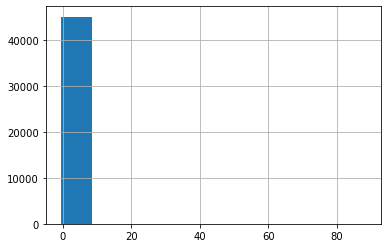

In [84]:
stats.zscore(df["price"]).hist();

In [85]:
stats.zscore(df["price"]).describe()

count    4.516700e+04
mean     1.006813e-17
std      1.000011e+00
min     -3.750869e-01
25%     -2.285842e-01
50%     -1.053887e-01
75%      1.154752e-01
max      8.836645e+01
Name: price, dtype: float64

In [86]:
df.insert(0, "price z-score", stats.zscore(df["price"]))

df[np.abs(df["price z-score"]) > 3]  # outliery

,price z-score,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
18688,68.259346,6186712,PLN,Seat,SUV,-1.449834,Benzyna,Przód,0.206204,True,2018,Polska,39200.0,Biały,Seat Arona 1.0,2021-03-10 14:25:00,3,13066.666667
19341,85.662125,7754715,PLN,Mazda,Kombi,0.640316,Benzyna,Przód,0.260949,True,2018,Polska,41049.0,Czarny,Mazda 6 2.0,2021-03-10 12:27:00,3,13683.000000
24822,82.520874,7471686,PLN,Nissan,SUV,-0.196581,Diesel,Przód,0.233577,False,2016,Polska,115540.0,Inny kolor,Nissan X-Trail 1.6,2021-03-13 22:55:00,5,23108.000000
26139,40.297661,3667344,PLN,Volkswagen,Kombi,0.577549,Diesel,Przód,0.270073,False,2014,Polska,200000.0,Niebieski,Volkswagen Golf Variant,2021-03-14 16:36:00,7,28571.428571
28845,22.347317,2050005,PLN,Škoda,Sedan,0.426908,Diesel,Przód,0.187956,True,2009,Polska,246004.0,Szary,Škoda Octavia 1.9,2021-03-14 15:15:00,12,20500.333333
31317,55.088386,4999999,PLN,Audi,Kombi,0.577549,Diesel,Przód,0.319343,True,2012,Niemcy,268425.0,Czarny,Audi A6 Avant,2021-03-17 18:06:00,9,29825.000000
47220,7.364019,699999,PLN,Fiat,Kombi,0.456199,Diesel,Przód,0.215328,True,2008,Polska,190000.0,Niebieski,Fiat Croma 1.9,2021-03-26 17:21:00,13,14615.384615
73404,84.943885,7690001,PLN,Mercedes-Benz,Minivan,-0.483218,Diesel,Przód,0.195255,False,2018,Polska,66236.0,Biały,Mercedes-Benz Klasa B 180,2021-04-07 15:19:00,3,22078.666667
82695,88.366454,7998377,PLN,Renault,Kombi,-0.154736,Benzyna,Przód,0.370438,False,2018,Polska,48500.0,Czarny,Renault Megane Grandtour,2021-04-11 20:25:00,3,16166.666667
83319,45.162739,4105691,PLN,Škoda,Kompakt,-1.449834,Benzyna,Przód,0.169708,True,2019,Polska,20163.0,Inny kolor,Škoda Fabia 1.0,2021-04-14 15:06:00,2,10081.500000


In [87]:
df[ (np.abs(df["price z-score"]) < 3)]  # nie-outliery

,price z-score,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
0,-0.039906,32900,PLN,Škoda,Sedan,-0.196581,Diesel,Przód,0.206204,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,4,43750.000000
2,-0.317374,7900,PLN,Fiat,Auta małe,-0.941419,Benzyna,Przód,0.122263,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,9,290000.000000
3,0.038783,39990,PLN,Kia,SUV,-0.014556,Diesel,Przód,0.206204,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,9,15347.000000
5,-0.189739,19400,PLN,BMW,Kombi,1.684345,Benzyna+LPG,Tył,0.319343,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00,16,17125.000000
6,0.778067,106600,PLN,Renault,SUV,-0.753117,Benzyna,Przód,0.251825,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00,1,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,0.148771,49900,PLN,Toyota,Kompakt,-1.451926,Benzyna,Przód,0.127737,False,2020,Polska,4903.0,Czarny,Toyota Aygo,2021-04-21 15:42:00,1,4903.000000
99987,0.177628,52500,PLN,Škoda,Kombi,-0.192396,Diesel,Przód,0.206204,True,2017,Polska,102448.0,Czerwony,Škoda Octavia,2021-04-21 15:21:00,4,25612.000000
99989,0.448436,76900,PLN,Ford,Kombi,-0.405805,Diesel,Przód,0.169708,True,2019,Polska,10.0,Biały,Ford Focus 1.5,2021-04-21 13:34:00,2,5.000000
99996,-0.322923,7400,PLN,Audi,Kombi,0.186300,Benzyna,Przód,0.224453,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00,22,11772.727273


Aby szybko przefiltrować tylko te wiersze, w których nie ma żadnego outliera można wykorzystać poniższy kawałek kodu. Wymagane jest użycie df-a zawierającego wyłącznie dane numeryczne.

In [88]:
df_num = df.select_dtypes(["int", "float"])

df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

,price z-score,price,engine_vol,power,prod_year,mileage,age,km_per_year
0,-0.039906,32900,-0.196581,0.206204,2017,175000.0,4,43750.000000
3,0.038783,39990,-0.014556,0.206204,2012,138123.0,9,15347.000000
5,-0.189739,19400,1.684345,0.319343,2005,274000.0,16,17125.000000
6,0.778067,106600,-0.753117,0.251825,2020,7.0,1,7.000000
7,-0.039906,32900,-0.196581,0.182482,2016,42771.0,5,8554.200000
...,...,...,...,...,...,...,...,...
99986,0.148771,49900,-1.451926,0.127737,2020,4903.0,1,4903.000000
99987,0.177628,52500,-0.192396,0.206204,2017,102448.0,4,25612.000000
99989,0.448436,76900,-0.405805,0.169708,2019,10.0,2,5.000000
99996,-0.322923,7400,0.186300,0.224453,1999,259000.0,22,11772.727273


**IQR**

Kolejną metodą na detekcję wartości odstających jest wykorzystanie *IQR* czyli inter-quartile range. IQR definiujemy jako różnicę między pierwszym oraz trzecim kwartylem:

$IQR= q_3 - q_1$

Zgodnie z tym podejściem outlierami są te wartości, które są mniejsze niż $q_1 - 1.5\cdot IQR$ albo większe niż $q_3 + 1.5\cdot IQR$

In [89]:
q3 = df["price"].quantile(0.75)
q1 = df["price"].quantile(0.25)

IQR = q3 - q1

In [90]:
df[(df["price"]<q1 - 1.5*IQR) | (df["price"]>q3 + 1.5*IQR)].sort_values("price")

,price z-score,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
71162,0.632663,93499,PLN,Mitsubishi,SUV,0.640316,Benzyna,Przód,0.270073,False,2020,Polska,1.0,Czarny,Mitsubishi ASX,2021-04-08 10:29:00,1,1.000000
8814,0.632663,93499,PLN,Mitsubishi,SUV,0.640316,Benzyna,Przód,0.270073,False,2020,Polska,1.0,Czarny,Mitsubishi ASX,2021-03-05 14:22:00,1,1.000000
61073,0.632674,93500,PLN,Volvo,Sedan,0.579641,Benzyna,Przód,0.443431,False,2018,Polska,77600.0,Czarny,Volvo S60 T5,2021-04-02 14:49:00,3,25866.666667
90748,0.632674,93500,PLN,BMW,SUV,0.634040,Diesel,Przód,0.270073,False,2020,Polska,9500.0,Biały,BMW X1 sDrive18d,2021-04-16 17:45:00,1,9500.000000
53025,0.632674,93500,PLN,Seat,Kompakt,-0.405805,Benzyna,Przód,0.270073,True,2020,Polska,1.0,Biały,Seat Leon,2021-03-29 09:57:00,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,68.259346,6186712,PLN,Seat,SUV,-1.449834,Benzyna,Przód,0.206204,True,2018,Polska,39200.0,Biały,Seat Arona 1.0,2021-03-10 14:25:00,3,13066.666667
24822,82.520874,7471686,PLN,Nissan,SUV,-0.196581,Diesel,Przód,0.233577,False,2016,Polska,115540.0,Inny kolor,Nissan X-Trail 1.6,2021-03-13 22:55:00,5,23108.000000
73404,84.943885,7690001,PLN,Mercedes-Benz,Minivan,-0.483218,Diesel,Przód,0.195255,False,2018,Polska,66236.0,Biały,Mercedes-Benz Klasa B 180,2021-04-07 15:19:00,3,22078.666667
19341,85.662125,7754715,PLN,Mazda,Kombi,0.640316,Benzyna,Przód,0.260949,True,2018,Polska,41049.0,Czarny,Mazda 6 2.0,2021-03-10 12:27:00,3,13683.000000


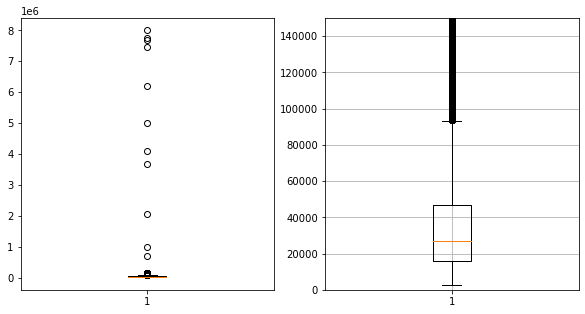

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].boxplot(df["price"])

ax[1].boxplot(df["price"])
ax[1].set_ylim(0, 1.5e5)

plt.grid()

### Brakujące dane

Niektóre modele są wrażliwe na brakujące dane. Możemy wówczas pozbyć się ich na dwa podstawowe sposoby:
- usunąć wiersze (kolumny) z brakującymi danymi
- wstawienie sztucznych danych - imputacja

In [92]:
df.dropna()

,price z-score,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
0,-0.039906,32900,PLN,Škoda,Sedan,-0.196581,Diesel,Przód,0.206204,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,4,43750.000000
2,-0.317374,7900,PLN,Fiat,Auta małe,-0.941419,Benzyna,Przód,0.122263,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,9,290000.000000
3,0.038783,39990,PLN,Kia,SUV,-0.014556,Diesel,Przód,0.206204,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,9,15347.000000
5,-0.189739,19400,PLN,BMW,Kombi,1.684345,Benzyna+LPG,Tył,0.319343,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00,16,17125.000000
6,0.778067,106600,PLN,Renault,SUV,-0.753117,Benzyna,Przód,0.251825,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00,1,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,0.148771,49900,PLN,Toyota,Kompakt,-1.451926,Benzyna,Przód,0.127737,False,2020,Polska,4903.0,Czarny,Toyota Aygo,2021-04-21 15:42:00,1,4903.000000
99987,0.177628,52500,PLN,Škoda,Kombi,-0.192396,Diesel,Przód,0.206204,True,2017,Polska,102448.0,Czerwony,Škoda Octavia,2021-04-21 15:21:00,4,25612.000000
99989,0.448436,76900,PLN,Ford,Kombi,-0.405805,Diesel,Przód,0.169708,True,2019,Polska,10.0,Biały,Ford Focus 1.5,2021-04-21 13:34:00,2,5.000000
99996,-0.322923,7400,PLN,Audi,Kombi,0.186300,Benzyna,Przód,0.224453,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00,22,11772.727273


Jeżeli zdecydujemy się usunąć brakujące dane mamy dwie możliwości:
- usunąć wiersze zawierające brakujące dane
- usunąć kolumny zawierające brakujące dane

Nie ma jednoznacznej odpowiedzi na pytanie, która z tych opcji jest właściwa. Zazwyczaj usuwamy wiersze, ponieważ prawie zawsze jest ich dużo więcej niż kolumn. Przykładowo, gdyby w zbiorze zawierającym 10 kolumn i 1000 wierszy była tylko jedna wartość brakująca, to usunięcie kolumny z tą wartością wiązałoby się z utratą aż 10% wszystkich danych. Usuwając wiersz jest to tylko 0.1%.

Jeżeli jednak mamy sytuację, w której jakaś kolumna zawiera bardzo duży odsetek wartości brakujących, to może bardziej się opłacić usunąć tę kolumnę, niż wszystkie wiersze dla których nie mamy w niej wartości.

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

### Selekcja cech

Nie zawsze więcej znaczy lepiej. Czasami wyrzucenie niektórych cech może poprawić działanie modelu. Istnieją różne sposoby na dobór optymalnego zestawu predyktorów. Niektóre z nich to:

**Metody nienadzorowane**
1. Usunięcie kolumn, które mają dużo wartości brakujących
2. Usunięcie kolumn współliniowych
3. Usunięcie kolumn z małą wariancją

**Metody nadzorowane**

4. Forward selection
5. Backward selection

#### Forward selection

Idea *forward selection*
1. Dla każdej cechy w zbiorze $X$ tworzymy prosty model, który wykorzystuje tylko tę jedną cechę
2. Znajdujemy najlepszy model (najlepszą cechę) na podstawie wybranej metryki
3. Zostawiamy tę cechę w zbiorze cech i dodajemy kolejne (po jednej). Trenujemy po kolei wszystkie modele i sprawdzamy, który sprawdza się najlepiej
4. Kontynuujemy ten proces albo do uzyskania z góry określonej liczby cech, albo tak długo aż dodanie kolejnej cechy nie poprawia modelu w oczekiwany sposób


In [93]:
from sklearn.feature_selection import SequentialFeatureSelector

df_ = df[["price", "engine_vol", "power", "mileage", "prod_year"]]
df_.head()

,price,engine_vol,power,mileage,prod_year
0,32900,-0.196581,0.206204,175000.0,2017
2,7900,-0.941419,0.122263,2610000.0,2012
3,39990,-0.014556,0.206204,138123.0,2012
5,19400,1.684345,0.319343,274000.0,2005
6,106600,-0.753117,0.251825,7.0,2020


In [94]:
X_ = df_.drop("price", axis=1)
y_ = df["price"]

In [95]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, direction='forward', scoring='r2', n_features_to_select=2)  # 1, 2, 3
sfs.fit(X_, y_)

sfs.get_support()

array([False,  True, False,  True])

In [96]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, direction='forward', scoring='r2', n_features_to_select='auto', tol=0.01)  # jeżeli dodanie cechy polepszy metrykę o mniej niż 'tol', przerywamy proces
sfs.fit(X_, y_)

sfs.get_support()

array([False,  True, False,  True])

#### Backward selection

Idea *backward selection* (odwrotność *forward selection*):
1. Trenujemy model ze wszystkimi cechami. Sprawdzamy która z nich jest najmniej istotna i wyrzucamy ją ze zbioru
2. Trenujemy następny model nie używając wyeliminowanej cechy i sprawdzamy, która tym razem jest najmniej istotna
3. Powtarzamy proces albo do uzyskania określonej liczby cech, albo tak długo jak dalsza eliminacja nie wpływa w wystarczającym stopniu na poprawę wyniku

In [97]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, direction='backward', scoring='r2', n_features_to_select=1)  # 2, 3
sfs.fit(X_, y_)

sfs.get_support()

array([False, False, False,  True])

In [98]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, direction='backward', scoring='r2', n_features_to_select='auto', tol=.1)  # jeżeli usunięcie kolumny pogorszy metrykę o więcej niż 'tol', przerywamy proces
sfs.fit(X_, y_)

sfs.get_support()

array([False,  True,  True,  True])

### One hot encoding / label encoding
Zamiana zmiennych kategorycznych na liczbowe.

Modele ML mogą operować wyłącznie na liczbach. Jeśli w danych jest tekst/kategorie należy zamienić je na liczby.

Istnieją na to dwa podstawowe sposoby.

#### One Hot Encoding

In [99]:
df["fuel"].head()

0         Diesel
2        Benzyna
3         Diesel
5    Benzyna+LPG
6        Benzyna
Name: fuel, dtype: object

In [100]:
df["fuel"].unique()

array(['Diesel', 'Benzyna', 'Benzyna+LPG', 'Benzyna+CNG', 'Hybryda'],
      dtype=object)

In [101]:
pd.get_dummies(df["fuel"])

,Benzyna,Benzyna+CNG,Benzyna+LPG,Diesel,Hybryda
0,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,1,0
5,0,0,1,0,0
6,1,0,0,0,0
...,...,...,...,...,...
99986,1,0,0,0,0
99987,0,0,0,1,0
99989,0,0,0,1,0
99996,1,0,0,0,0


In [102]:
pd.get_dummies(df["fuel"], drop_first=True)

,Benzyna+CNG,Benzyna+LPG,Diesel,Hybryda
0,0,0,1,0
2,0,0,0,0
3,0,0,1,0
5,0,1,0,0
6,0,0,0,0
...,...,...,...,...
99986,0,0,0,0
99987,0,0,1,0
99989,0,0,1,0
99996,0,0,0,0


In [103]:
pd.get_dummies(df["fuel"], drop_first=True, prefix="fuel")

,fuel_Benzyna+CNG,fuel_Benzyna+LPG,fuel_Diesel,fuel_Hybryda
0,0,0,1,0
2,0,0,0,0
3,0,0,1,0
5,0,1,0,0
6,0,0,0,0
...,...,...,...,...
99986,0,0,0,0
99987,0,0,1,0
99989,0,0,1,0
99996,0,0,0,0


---

In [104]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit_transform(df[["fuel"]])  # macierz rzadka (wydajna obliczeniowo i pamięciowo)
ohe.fit_transform(df[["fuel"]]).toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [105]:
ohe.get_feature_names_out()

array(['fuel_Benzyna', 'fuel_Benzyna+CNG', 'fuel_Benzyna+LPG',
       'fuel_Diesel', 'fuel_Hybryda'], dtype=object)

In [106]:
pd.DataFrame(ohe.fit_transform(df[["fuel"]]).toarray(), index=df.index, columns=ohe.get_feature_names_out())

,fuel_Benzyna,fuel_Benzyna+CNG,fuel_Benzyna+LPG,fuel_Diesel,fuel_Hybryda
0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99986,1.0,0.0,0.0,0.0,0.0
99987,0.0,0.0,0.0,1.0,0.0
99989,0.0,0.0,0.0,1.0,0.0
99996,1.0,0.0,0.0,0.0,0.0


In [107]:
ohe = OneHotEncoder(drop='first')

pd.concat([df.drop("fuel", axis=1),
           pd.DataFrame(ohe.fit_transform(df[["fuel"]]).toarray(), index=df.index, columns=ohe.get_feature_names_out())],
         axis=1)

,price z-score,price,currency,brand,body,engine_vol,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year,fuel_Benzyna+CNG,fuel_Benzyna+LPG,fuel_Diesel,fuel_Hybryda
0,-0.039906,32900,PLN,Škoda,Sedan,-0.196581,Przód,0.206204,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,4,43750.000000,0.0,0.0,1.0,0.0
2,-0.317374,7900,PLN,Fiat,Auta małe,-0.941419,Przód,0.122263,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,9,290000.000000,0.0,0.0,0.0,0.0
3,0.038783,39990,PLN,Kia,SUV,-0.014556,Przód,0.206204,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,9,15347.000000,0.0,0.0,1.0,0.0
5,-0.189739,19400,PLN,BMW,Kombi,1.684345,Tył,0.319343,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00,16,17125.000000,0.0,1.0,0.0,0.0
6,0.778067,106600,PLN,Renault,SUV,-0.753117,Przód,0.251825,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00,1,7.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,0.148771,49900,PLN,Toyota,Kompakt,-1.451926,Przód,0.127737,False,2020,Polska,4903.0,Czarny,Toyota Aygo,2021-04-21 15:42:00,1,4903.000000,0.0,0.0,0.0,0.0
99987,0.177628,52500,PLN,Škoda,Kombi,-0.192396,Przód,0.206204,True,2017,Polska,102448.0,Czerwony,Škoda Octavia,2021-04-21 15:21:00,4,25612.000000,0.0,0.0,1.0,0.0
99989,0.448436,76900,PLN,Ford,Kombi,-0.405805,Przód,0.169708,True,2019,Polska,10.0,Biały,Ford Focus 1.5,2021-04-21 13:34:00,2,5.000000,0.0,0.0,1.0,0.0
99996,-0.322923,7400,PLN,Audi,Kombi,0.186300,Przód,0.224453,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00,22,11772.727273,0.0,0.0,0.0,0.0


#### Label Encoding

In [108]:
df["drive"]

0        Przód
2        Przód
3        Przód
5          Tył
6        Przód
         ...  
99986    Przód
99987    Przód
99989    Przód
99996    Przód
99999    Przód
Name: drive, Length: 45167, dtype: object

In [109]:
df["drive"].unique()

array(['Przód', 'Tył'], dtype=object)

In [110]:
df["drive"].astype('category')

0        Przód
2        Przód
3        Przód
5          Tył
6        Przód
         ...  
99986    Przód
99987    Przód
99989    Przód
99996    Przód
99999    Przód
Name: drive, Length: 45167, dtype: category
Categories (2, object): ['Przód', 'Tył']

In [111]:
df["drive"].astype('category').cat.categories

Index(['Przód', 'Tył'], dtype='object')

In [112]:
df["drive"].astype('category').cat.codes

0        0
2        0
3        0
5        1
6        0
        ..
99986    0
99987    0
99989    0
99996    0
99999    0
Length: 45167, dtype: int8

In [113]:
df["drive"].astype('category').cat.codes.value_counts()

0    41217
1     3950
dtype: int64

In [114]:
df["body"].astype('category')

0            Sedan
2        Auta małe
3              SUV
5            Kombi
6              SUV
           ...    
99986      Kompakt
99987        Kombi
99989        Kombi
99996        Kombi
99999        Sedan
Name: body, Length: 45167, dtype: category
Categories (9, object): ['Auta małe', 'Auta miejskie', 'Coupe', 'Kabriolet', ..., 'Kompakt', 'Minivan', 'SUV', 'Sedan']

In [115]:
df["body"].astype('category').cat.codes.value_counts()

4    9914
5    9377
1    6630
8    6578
6    5531
7    4425
0    1411
2     904
3     397
dtype: int64

---

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df["body"])
le.transform(df["body"])
# le.fit_transform(df["body"])

array([8, 0, 7, ..., 4, 4, 8])

In [117]:
df["body"] = le.transform(df["body"])
df.head()

,price z-score,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
0,-0.039906,32900,PLN,Škoda,8,-0.196581,Diesel,Przód,0.206204,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,4,43750.0
2,-0.317374,7900,PLN,Fiat,0,-0.941419,Benzyna,Przód,0.122263,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,9,290000.0
3,0.038783,39990,PLN,Kia,7,-0.014556,Diesel,Przód,0.206204,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,9,15347.0
5,-0.189739,19400,PLN,BMW,4,1.684345,Benzyna+LPG,Tył,0.319343,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00,16,17125.0
6,0.778067,106600,PLN,Renault,7,-0.753117,Benzyna,Przód,0.251825,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00,1,7.0


---
**Podsumowanie**

Aby poprawić dokładność predykcji możemy stosować następujące techniki preprocessingu danych:
- skalowanie
- usunięcie wartości odstających
- usunięcie / wypełnienie wartości brakujących
- selekcja cech
- one hot / label encoding

> ZADANIA

## Regresja wielomianowa
### Generacja danych losowych

In [118]:
np.random.seed(0)

x_ = np.arange(30)
y_ = x_**2 - 2*x_ + 4 + np.random.normal(0, 30, size=30)

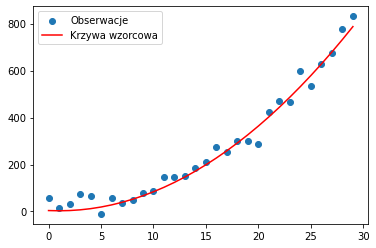

In [119]:
plt.scatter(x_, y_, label='Obserwacje')
plt.plot(x_, x_**2 - 2*x_ + 4, 'red', label='Krzywa wzorcowa')

plt.legend();

### Model regresji liniowej

In [120]:
model = LinearRegression()
model.fit(x_.reshape(-1, 1), y_)
y_pred_ = model.predict(x_.reshape(-1, 1))

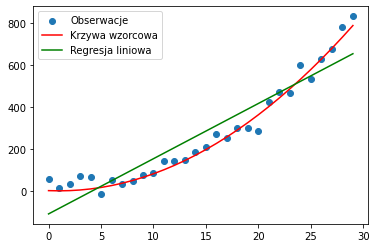

In [121]:
plt.scatter(x_, y_, label='Obserwacje')
plt.plot(x_, x_**2 - 2*x_ + 4, 'red', label='Krzywa wzorcowa')
plt.plot(x_, y_pred_, 'green', label='Regresja liniowa')

plt.legend();

### Regresja wielomianowa

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_.reshape(-1, 1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

In [123]:
poly_model = LinearRegression()

poly_model.fit(poly_features, y_)
y_pred_poly_ = poly_model.predict(poly_features)

In [124]:
poly_model.coef_

array([-7.0324532 ,  1.14597216])

In [125]:
poly_model.intercept_

48.62987131473483

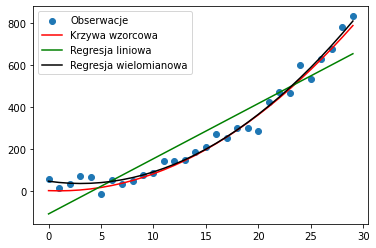

In [126]:
plt.scatter(x_, y_, label='Obserwacje')
plt.plot(x_, x_**2 - 2*x_ + 4, 'red', label='Krzywa wzorcowa')
plt.plot(x_, y_pred_, 'green', label='Regresja liniowa')
plt.plot(x_, y_pred_poly_, 'black', label='Regresja wielomianowa')

plt.legend();

> ZADANIA

## Overfitting
Nadmierne dopasowanie na danych uczących, złe wyniki na danych testowych.

Po polsku - przeuczenie, nadmierne dopasowanie.

### Bias-variance problem (tradeoff)

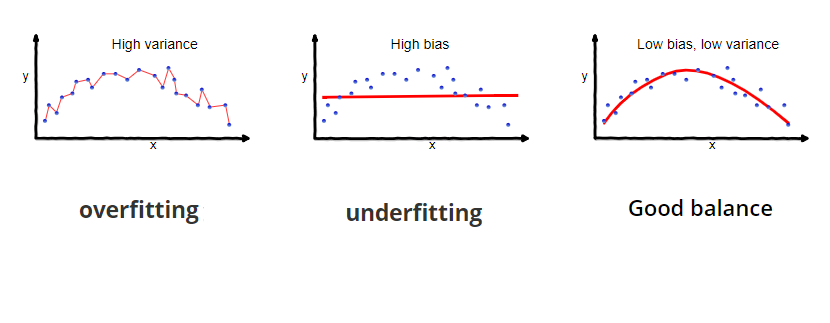

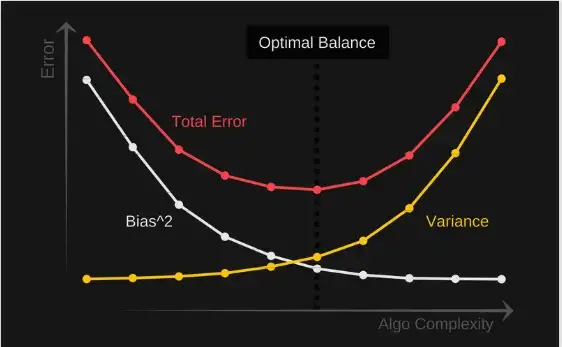

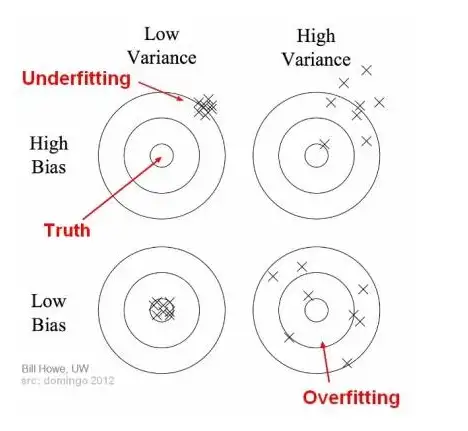

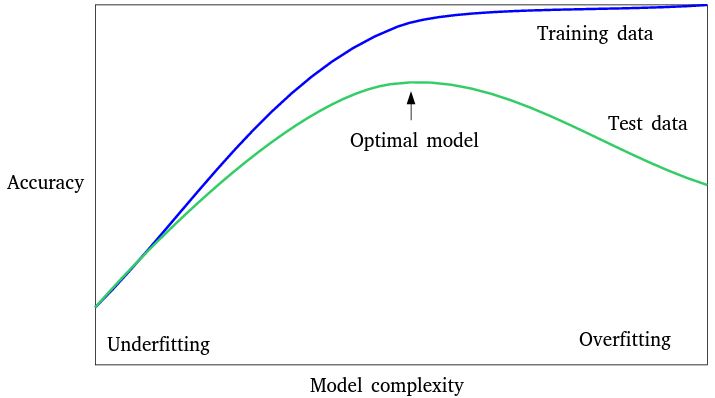


Źródło: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

**Jak zapobiegać przeuczeniu dla danych tabelarycznych?**
- dodać więcej danych - model będzie potrafił bardziej uogólnić relację między inputami a outputem
- selekcja cech - często wykorzystanie wszystkich kolumn, które mamy w tabeli nie jest dobrym pomysłem
- użyć prostszego modelu
- cross-validacja - o tym za chwilę
- regularyzacja - o tym później

### Cross-walidacja

Jeżeli wytrenujemy model na określonej części zbioru danych istnieje ryzyko, że wyniki nie będą wystarczająco reprezentatywne. Innymi słowy, może okazać się, że test na tych wierszach które znalazły się w zbiorze testowym wypada nieźle, ale gdybyśmy testowali model na innych danych wynik byłby inny.

Aby móc użyć wszystkich danych zarówno do treningu jak i do testowania (ale nie naraz) używamy cross-walidacji (walidacji krzyżowej).

In [127]:
df = pd.read_csv("data/cars.csv")[["price", "power", "engine_vol", "mileage"]].dropna()
df.head()

,price,power,engine_vol,mileage
0,32900,115.0,1598.0,175000.0
1,32500,116.0,1598.0,228000.0
2,7900,69.0,1242.0,2610000.0
3,39990,115.0,1685.0,138123.0
4,42900,115.0,1685.0,175962.0


In [128]:
X, y = df.drop("price", axis=1), df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

19297.143398089072

---

In [129]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')  # neg -> maksymalizacja scoringu (dla regresji chcemy minimalizować, dla klasyfikacji - maksymalizować 'cross_val_score')

scores

array([19382.56797635, 20417.08758503, 23280.33165348, 19762.29933805,
       19098.19821262, 21685.01836733, 18529.21867731, 24780.51557077,
       22559.34422671, 19129.59614765])

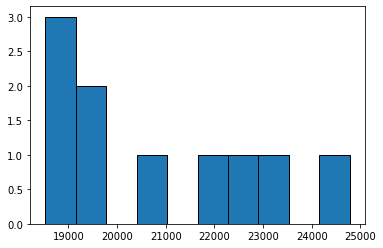

In [130]:
plt.hist(scores, edgecolor='k');

---

In [131]:
from sklearn.model_selection import KFold

model = LinearRegression()

cv = KFold(n_splits=10, shuffle=True)

In [132]:
y_test_all = []
y_pred_all = []
scores = []

for train_idx, test_idx in cv.split(X):
    
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    
    y_test_all.extend(y.iloc[test_idx])
    y_pred_all.extend(y_pred)
    
    score = mean_absolute_error(y.iloc[test_idx], y_pred)
    scores.append(score)

In [133]:
scores

[24401.972763263442,
 19534.835738784757,
 22432.743072154917,
 18970.378004794034,
 20658.435368292612,
 19848.308375888282,
 20796.139165852263,
 21482.36858377352,
 21839.851875379147,
 18941.617958554434]

In [134]:
mean_absolute_error(y_test_all, y_pred_all)  # bez CV - 19297.14339808894

20890.700597521412

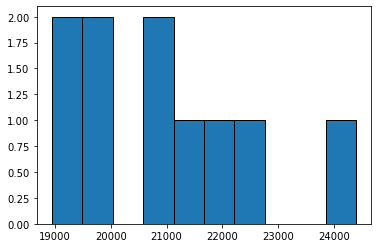

In [135]:
plt.hist(scores, edgecolor='k');

Przewagą cross-walidacji **nie jest** to, że używamy do treningu większej liczby danych, bo naraz używamy ich tyle samo. Chodzi o to, że niwelujemy bias wynikający z tego, że model był uczony oraz testowany tylko za pomocą określonych wycinków zbioru. Przy tym za każdym razem kiedy liczymy metrykę na danych testowych używamy tylko tych danych, których model jeszcze nie widział.

Cross-walidacja **nie polega** na dotrenowywaniu modelu na coraz to kolejnych partiach danych.

**ZALETY:**
- Używając każdej obserwacji zarówno do treningu jak i testu możemy zredukować overfitting

**WADY:**
- Dłuższy czas obliczeń - trenujemy $k$ modeli zamiast jednego

**DODATKOWE MATERIAŁY:**
- https://towardsdatascience.com/cross-validation-430d9a5fee22

> ZADANIA

---

> PROJEKT

## Regularyzacja


In [136]:
df = pd.read_csv("data/cars.csv").dropna()

X = df[["engine_vol", "power", "prod_year", "mileage"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
5,19400,PLN,BMW,Kombi,2497.0,Benzyna+LPG,Tył,177.0,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przód,140.0,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00


Regularyzacja polega na takim podejściu do trenowania modelu, żeby nieco zmodyfikować minimalizowaną funkcję błędu.

Przykładowo w regresji liniowej minimalizujemy funkcję będącą sumą kwadratów residuów (*residual sum of squares*) $RSS$:

$RSS = \sum \left( y_i - (a_0 + \sum a_i\cdot x_i) \right)^2$

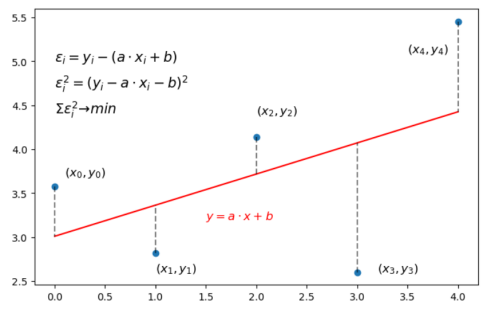

Możemy zmodyfikować tę funkcję zanim zaczniemy dopasowywać prostą do zbioru punktów. W ten sposób prosta nie będzie przechodzić przez punkty zbioru uczącego w najbardziej optymalny sposób co pozwoli zmniejszyć overfitting i przełoży się na lepsze działanie modelu.

### Regularyzacja Ridge (regresja grzbietowa)

Metoda *ridge* polega na dodaniu do funkcij RSS dodatkowego członu, który będzie tym większy, im większe będą współczynniki funkcji regresji:

$\sum \left( y_i - (a_0 + \sum a_i\cdot x_i) \right)^2 + \lambda \sum a_i^2 = RSS + \lambda \sum a_i^2$

Jeżeli $\lambda = 0$ to efekt regularyzacji będzie zerowy. Im bardziej zwiększamy $\lambda$ tym bardziej ograniczamy zmienność modelu czyli nachylenie prostej (płaszczyzny, hiperpłaszczyzny).

Regularyzację *ridge* nazywamy również regularyzacją $L2$ a współczynnik $\lambda$ współczynnikiem regularyzacji $L2$.

In [137]:
model = LinearRegression()

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

12052.392845768123

In [138]:
model.coef_

array([ 1.84117672e+00,  2.50464023e+02,  3.10833720e+03, -8.15847144e-02])

In [139]:
np.mean(np.abs(model.coef_))

840.1809962111037

In [140]:
from sklearn.linear_model import Ridge

In [141]:
model = Ridge(alpha=100)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

12052.341272665048

In [142]:
model.coef_

array([ 1.83817459e+00,  2.50496503e+02,  3.10775402e+03, -8.16017721e-02])

In [143]:
np.mean(np.abs(model.coef_))

840.0425743817702

### Regularyzacja Lasso

*Least Absolute Shrinkage and Selection Operator*

Idea metody *LASSO* jest podobna do metody *ridge*, różni się jednak tym, że w członie dodanym do funkcji $RSS$ sumujemy nie kwadraty a wartości bezwzględne współczynników funkcji regresji:

$\sum \left( y_i - (a_0 + \sum a_i\cdot x_i) \right)^2 + \lambda \sum |a_i| = RSS + \lambda \sum |a_i|$

Metodę *LASSO* nazywamy również regularyzacją $L1$. Może ona prowadzić do współczynników $a_i$ równych 0 co w praktyce polega na wyeliminowaniu niepotrzebnych cech ze zbioru.

In [144]:
from sklearn.linear_model import Lasso

In [145]:
model = Lasso(alpha=1000)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

12047.37166484661

In [146]:
model.coef_

array([ 1.68037305e+00,  2.51998229e+02,  3.05306264e+03, -8.33460704e-02])

In [147]:
np.mean(np.abs(model.coef_))

826.7061480814333

### ElasticNet

Metoda *ElasticNet* jest połączeniem dwóch poprzednich metod - *ridge* oraz *LASSO*. Funkcja, którą minimalizujemy wygląda w następujący sposób:

$\sum \left( y_i - (a_0 + \sum a_i\cdot x_i) \right)^2 + \lambda_1 \sum |a_i| + \lambda_2 \sum a_i^2 = RSS + \lambda_1 \sum |a_i| + \lambda_2 \sum a_i^2$

In [148]:
from sklearn.linear_model import ElasticNet

In [149]:
model = ElasticNet(alpha=2, l1_ratio=0.5)  # lambda_1 = alpha * l1_ratio, lambda_1 + lambda_2 = alpha

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

12048.45304055672

In [150]:
model.coef_

array([ 9.59899176e-01,  2.59992373e+02,  2.93656879e+03, -8.66122415e-02])

In [151]:
np.mean(np.abs(model.coef_))

799.4019184990442

**MATERIAŁY DODATKOWE:**
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

> ZADANIA

## Grid search (przeszukiwanie siatki)

Modele ML często mają hiperparametry, których tuning może zmienić działanie modelu. W zależności od wartości tych hiperparametrów predykcja będzie się różnić. Ważnym elementem procesu trenowania takiego modelu jest znalezienie optymalnego zestawu hiperparametrów. Sposobem na uzyskanie takiego optymalnego zestawu jest użycie wielu różnych kombinacji i określenie, który sprawdza się najlepiej.

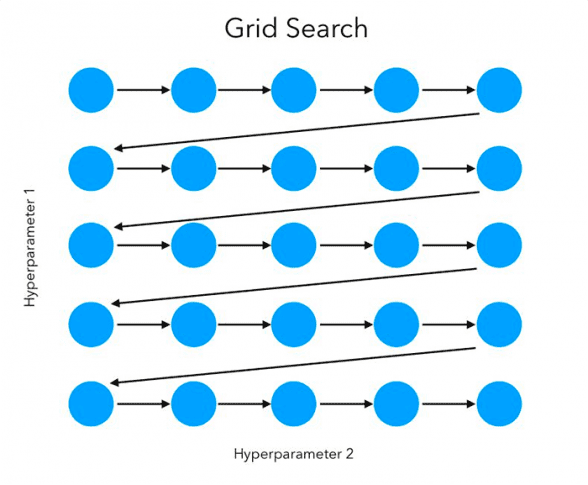

Źródło: https://maelfabien.github.io/machinelearning/Explorium4/#grid-search

In [152]:
params = {"alpha": [0.5, 1, 2, 5], "l1_ratio": [0.1, 0.2, 0.5, 0.8]}

best_score = 1e10
optimal_alpha = None
optimal_l1_ratio = None

for alpha in params["alpha"]:
    for l1_ratio in params["l1_ratio"]:
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = mean_absolute_error(y_test, y_pred)
        
        if score < best_score:
            
            best_score = score
            optimal_alpha = alpha
            optimal_l1_ratio = l1_ratio

In [153]:
print(f"Best score: {round(best_score, 2)}. Optimal alpha: {optimal_alpha}. Optimal l1_ratio: {optimal_l1_ratio}")

Best score: 12047.26. Optimal alpha: 1. Optimal l1_ratio: 0.2


In [154]:
best_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mean_absolute_error(y_test, y_pred)

12047.258129258367

Po znalezieniu optymalnych hiperparametrów możemy dokonać ewaluacji optymalnego modelu poprzez jego wytrenowanie oraz policzenie odpowiedniej metryki. Jeśli jednak zrobimy to na **zbiorze testowym** wynik ten nie będzie obiektywny. Dlaczego? Ponieważ te dane zostały użyte do znalezienia optymalnych hiperparametrów a więc te hiperparametry w oczywisty sposób będą się dobrze sprawdzać na zbiorze testowym. Żeby pozbyć się tego problemu należy użyć **zbioru walidacyjnego**.

Ewaluacja modeli ML powinna odbywać się tylko na danych, których model wcześniej nie widział. Tylko wtedy ewaluacja będzie w stanie wykazać czy model jest w stanie **generalizować** czyli dokonywać predykcji na danych, których jeszcze nie widział.

Stwórzmy więc teraz zbiory: uczący, walidacyjny oraz testowy

In [155]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=30)

In [156]:
print(f"train: {len(y_train)}, valid: {len(y_valid)}, test: {len(y_test)}")

train: 29779, valid: 7445, test: 9306


In [157]:
params = {"alpha": [0.5, 1, 2, 5], "l1_ratio": [0.1, 0.2, 0.5, 0.8]}

best_score = 1e10
optimal_alpha = None
optimal_l1_ratio = None

for alpha in params["alpha"]:
    for l1_ratio in params["l1_ratio"]:
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_valid)  # X_valid !!!
        score = mean_absolute_error(y_valid, y_pred)  # y_valid !!!
        
        if score < best_score:
            
            best_score = score
            optimal_alpha = alpha
            optimal_l1_ratio = l1_ratio

In [158]:
print(f"Best score: {round(best_score, 2)}. Optimal alpha: {optimal_alpha}. Optimal l1_ratio: {optimal_l1_ratio}")

Best score: 13111.94. Optimal alpha: 2. Optimal l1_ratio: 0.2


In [159]:
best_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
best_model.fit(X_train_valid, y_train_valid)  # rozszerzenie zbioru treningowego o zbiór walidacyjny (lepsze uczenie modelu - więcej danych)
y_pred = best_model.predict(X_test)

mean_absolute_error(y_test, y_pred)

11410.18317897543

Powyższy proces przeszukiwania siatki możemy wzbogacić o cross-walidację. Należy wówczas spodziewać się lepszych wyników ze względu na przewagę cross-walidacji nad zwykłym procesem uczenia. Wadą takiego podejścia jest to, że sam grid search jest czasochłonny (ze względu na wiele modeli do nauczenia) a cross-walidacja mnoży tę ilość kilkukrotnie. Wykonując 5-krotną cross-walidację przy grid searchu, w którym testuje pod 4 wartości dwóch różnych hiperparametrów, mamy do wytrenowania  5 * 4 * 4 = 80 modeli.

In [160]:
params = {"alpha": [0.5, 1, 2, 5], "l1_ratio": [0.1, 0.2, 0.5, 0.8]}

best_score = 1e10
optimal_alpha = None
optimal_l1_ratio = None

for alpha in params["alpha"]:
    for l1_ratio in params["l1_ratio"]:
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        
        # cross-walidacja
        score = np.mean(-cross_val_score(model, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_absolute_error'))
        
        if score < best_score:
            
            best_score = score
            optimal_alpha = alpha
            optimal_l1_ratio = l1_ratio

In [161]:
print(f"Best score: {round(best_score, 2)}. Optimal alpha: {optimal_alpha}. Optimal l1_ratio: {optimal_l1_ratio}")

Best score: 12961.11. Optimal alpha: 2. Optimal l1_ratio: 0.2


In [162]:
best_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mean_absolute_error(y_test, y_pred)

11458.618284407028

Do implementacji `grid search` z cross-walidacją w `sklearn` służy klasa `GridSearchCV`

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
params

{'alpha': [0.5, 1, 2, 5], 'l1_ratio': [0.1, 0.2, 0.5, 0.8]}

In [165]:
model = ElasticNet()
gs = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')  # scoring='r2'

gs.fit(X_train_valid, y_train_valid)  # .fit() trenuje wszystkie modele wynikające z zestawu hiperparametrów
                                      # a następnie wybiera najbardziej optymalną kombinację i trenuje kolejny model z jej wykorzystaniem

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 2, 5],
                         'l1_ratio': [0.1, 0.2, 0.5, 0.8]},
             scoring='neg_mean_absolute_error')

In [166]:
y_pred = gs.predict(X_test)

In [167]:
mean_absolute_error(y_test, y_pred)

11410.18317897543

In [168]:
gs.best_params_

{'alpha': 2, 'l1_ratio': 0.2}

In [169]:
gs.best_estimator_

ElasticNet(alpha=2, l1_ratio=0.2)

In [170]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093124,0.076826,0.003887,0.000215,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",-13238.449061,-13577.626674,-12263.861847,-13510.904541,-12283.398804,-12974.848186,583.744390,9
1,0.075507,0.062030,0.003904,0.000254,0.5,0.2,"{'alpha': 0.5, 'l1_ratio': 0.2}",-13240.493029,-13579.878902,-12265.851252,-13511.196648,-12283.418206,-12976.167608,583.959312,11
2,0.019266,0.009967,0.003646,0.000102,0.5,0.5,"{'alpha': 0.5, 'l1_ratio': 0.5}",-13246.976751,-13587.209879,-12272.170481,-13512.481235,-12283.785818,-12980.524833,584.679763,12
3,0.017091,0.006986,0.003519,0.000098,0.5,0.8,"{'alpha': 0.5, 'l1_ratio': 0.8}",-13254.156147,-13595.576282,-12279.033109,-13514.477245,-12284.781721,-12985.604901,585.540373,14
4,0.014004,0.001012,0.003771,0.000622,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-13222.718110,-13560.868825,-12249.281976,-13510.883010,-12285.553805,-12965.861145,581.955712,5
5,0.015196,0.002773,0.003659,0.000322,1,0.2,"{'alpha': 1, 'l1_ratio': 0.2}",-13225.725115,-13564.036829,-12252.045150,-13510.503646,-12284.793270,-12967.420802,582.297767,6
6,0.014175,0.000612,0.003586,0.000112,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-13236.434229,-13575.473327,-12261.949917,-13510.636799,-12283.448092,-12973.588473,583.523325,8
7,0.013992,0.001374,0.003793,0.000193,1,0.8,"{'alpha': 1, 'l1_ratio': 0.8}",-13249.277711,-13589.864269,-12274.403049,-13513.059979,-12284.019739,-12982.124949,584.949717,13
8,0.015529,0.000903,0.003578,0.000056,2,0.1,"{'alpha': 2, 'l1_ratio': 0.1}",-13205.693665,-13545.325892,-12236.028581,-13521.096808,-12300.385803,-12961.706150,579.139423,2
9,0.029774,0.029929,0.003807,0.000228,2,0.2,"{'alpha': 2, 'l1_ratio': 0.2}",-13207.657190,-13547.066230,-12237.314593,-13517.531612,-12295.975755,-12961.109076,579.658276,1


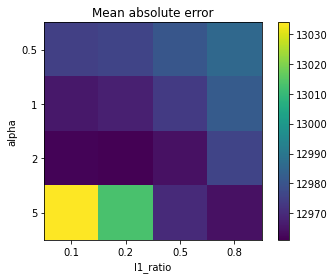

In [171]:
plt.imshow(np.array(-results.mean_test_score).reshape(4, 4))

plt.xticks(range(4), params["l1_ratio"])
plt.yticks(range(4), params["alpha"])

plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.colorbar()
plt.title("Mean absolute error");

Alternatywą dla `GridSearchCV` jest biblioteka `hyperopt`.

> ZADANIA

## Pipeline'y (potoki przetwarzania)

Jeżeli proces przetwarzania danych jest złożony i zawiera wiele etapów, wygodnie jest użyć klasy `Pipeline`, która modeluje cały ten proces.

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

*Przykład*: przeskalowanie cech za pomocą `MinMaxScaler` a następnie wytrenowanie go estymatorem `LinearRegression`

---
**Podejście standardowe**

In [173]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

12052.39284576815

**Wykorzystanie `Pipeline`**

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline

In [175]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", LinearRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mean_absolute_error(y_test, y_pred)

12052.39284576815

In [176]:
pipe.steps  # lista tupli

[('scaler', MinMaxScaler()), ('regressor', LinearRegression())]

In [177]:
pipe.named_steps  # (pseudo) słownik

{'scaler': MinMaxScaler(), 'regressor': LinearRegression()}

In [178]:
pipe.named_steps["regressor"].coef_

array([  14361.17843472,  137254.28472551,  376108.80122251,
       -283914.72450126])

---

`Pipeline` może być użyty również kiedy korzystamy z grid searcha.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [180]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", ElasticNet())])
params = {"regressor__alpha": [0.5, 1, 2, 5], "regressor__l1_ratio": [0.1, 0.2, 0.5, 0.8]}

gs = GridSearchCV(pipe, param_grid=params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', ElasticNet())]),
             param_grid={'regressor__alpha': [0.5, 1, 2, 5],
                         'regressor__l1_ratio': [0.1, 0.2, 0.5, 0.8]})

In [181]:
gs.best_params_

{'regressor__alpha': 0.5, 'regressor__l1_ratio': 0.8}

In [182]:
y_pred = gs.predict(X_test)
mean_absolute_error(y_test, y_pred)

22792.16691050829

In [183]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', ElasticNet(alpha=0.5, l1_ratio=0.8))])

---
Inny sposób tworzenia pipeline'u:

In [184]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(MinMaxScaler(), ElasticNet())

In [185]:
pipe

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('elasticnet', ElasticNet())])

In [186]:
pipe.named_steps

{'minmaxscaler': MinMaxScaler(), 'elasticnet': ElasticNet()}

> ZADANIA